# Machine Learning LAB 2: SUPPORT VECTOR MACHINES
Course 2022/23: P. Zanuttigh, M. Mel, F. Barbato

The notebook contains some simple tasks to be performed with **SUPPORT VECTOR MACHINES (SVM)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Weather Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for weather classification. We will use a dataset collected using the Luxottica iSee glasses, similarly to the previous laboratory.
The dataset corresponds to 8 hours of atmospherical data recordings sampled every 3 seconds.

The dataset labels are the following:

| ID | Label |
| :-: | :-: |
| 0 | Sunny |
| 1 | Rain |
| 2 | Cloudy |
| 3 | Mostly Clear|

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB2.ipynb**, failure to do so will incur in a **lower grade**.
<br>

**Student name**: Riccardo Tancredi<br>
**ID Number**: 2089395

In [1]:
#load the required packages
%matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load the dataset
def load_dataset(path):
    with np.load(path) as data:
        x, y = data["x"], data["y"]
        
        # normalize data
        x -= x.mean(axis=0)
        x /= x.std(axis=0)
        
    return x, y

## A) Hyper-parameter search

**TO DO (A.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [3]:
# fix your ID ("numero di matricola") and the seed for random generator
# as usual you can try different seeds by adding a constant to the number:
# ID = 1234567 + X
ID = 2089395
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (while the **training** set is **typically larger**, here we set the number of training samples to 1000 and 4000 for the test data).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
X, y = load_dataset("data/lux.npz")
print(X.shape, y.shape)

(15099, 3) (15099,)


In [5]:
# The task is quite easy, let's add noise to make it more challenging!
# You can try without noise (comment the next 2 lines, easy task), with the suggested amount of noise,
# or play with the suggested amount of noise 

noise = np.random.normal(0,0.1,X.shape)
X=X+noise

In [6]:
y[y==0].size

6118

**TO DO (A.1):** **Divide** the **data into training and test set** (for this part use 1000 samples in the **first** set, 4000 in the **second** one). Make sure that each label is present at least 10 times in training. If it is not, then keep adding permutations to the initial data until this happens. <br>


In [7]:
#random permute the data and split into training and test taking the first 1000
#data samples as training and 4000 samples as test
reached = 0
m_training = 1000
m_test = 4000

# To make sure that each label is present at least 10 times in training
while reached <= 0:
    permutation =  np.random.permutation(X.shape[0])        # random permutation
    y_trial =  y[permutation]
    y_train = y_trial[:m_training]

    # check if each leabel is present at least 10 times in training, otherwise loop until it gets there:
    counter = 0
    for label in range(4):
        if y_train[y_train == label].size >= 10:
            counter += 1
    if counter == 4:
        y = y[permutation]
        reached += 1 

X = X[permutation]
X_train = X[:m_training]
X_test = X[m_training:m_test+m_training]
y_train = y[:m_training]
y_test = y[m_training:m_test+m_training] 

print("X_train shape:", X_train.shape,"X_test shape:", X_test.shape,"||","y_train shape:",  y_train.shape,"y_test shape:", y_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

X_train shape: (1000, 3) X_test shape: (4000, 3) || y_train shape: (1000,) y_test shape: (4000,)
Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [408 159 376  57]


In [8]:
#function for plotting an image and printing the corresponding label
def plot_input(X_matrix, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.get_cmap('Accent', 4)
    im = ax.scatter(X_matrix[:,0], X_matrix[:,1], X_matrix[:,2], c=labels, cmap=cmap)
    im.set_clim(-0.5, 3.5)
    cbar=fig.colorbar(im, ticks=[0,1,2,3], orientation='vertical', cmap=cmap)
    cbar.ax.set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear']) 
    

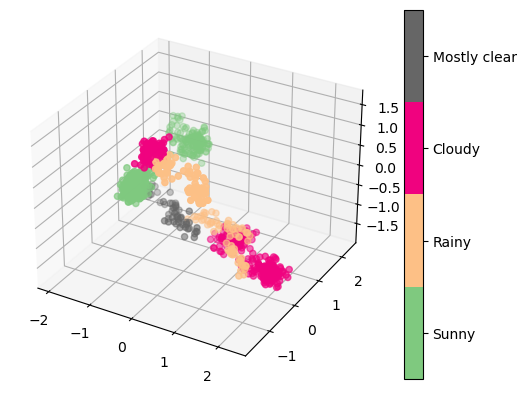

In [9]:
#let's try the plotting function
plot_input(X_train,y_train)

**TO DO (A.2):** Use a SVM classfier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel.

In [10]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [ 0.01, 0.1, 1, 10]}

#train linear SVM

train_linear_SVM = SVC(kernel='linear', probability=True, random_state=ID)
SVM_output = GridSearchCV(train_linear_SVM, parameters, cv=4)   # cross-validation: cv=4
SVM_output.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
best_params = SVM_output.best_params_
print(best_params)

print("Score with best parameters:")
best_score = SVM_output.best_score_       
print(best_score)

# GridSearchCV(estimator=SVC(kernel='linear'), param_grid=parameters)
print("All scores on the grid:")
# sorted(SVM_output.cv_results_.keys())
# SVM_output.cv_results_
SVM_output.cv_results_['mean_test_score']

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 10}
Score with best parameters:
0.901
All scores on the grid:


array([0.782, 0.868, 0.898, 0.901])

**TO DO (A.3):** Pick a model for the Polynomial kernel with degree=2.

In [11]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1], 'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

train_poly2_SVM = SVC(kernel='poly', degree=2, probability=True, random_state=ID)
SVM_output = GridSearchCV(train_poly2_SVM, parameters, cv=4)
SVM_output.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
best_params = SVM_output.best_params_
print(best_params)

print("Score with best parameters:")
best_score = SVM_output.best_score_       
print(best_score)

print("All scores on the grid:")
SVM_output.cv_results_['mean_test_score']

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 1, 'gamma': 1.0}
Score with best parameters:
0.947
All scores on the grid:


array([0.408, 0.408, 0.843, 0.408, 0.781, 0.936, 0.408, 0.843, 0.947])

**TO DO (A.4):** Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [12]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1, 1]}

#run SVM with poly of higher degree kernel
degree = 3

train_high_poly_SVM = SVC(kernel='poly', degree=degree, probability=True, random_state=ID)
SVM_output = GridSearchCV(train_high_poly_SVM, parameters, cv=4)
SVM_output.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
best_params = SVM_output.best_params_
print(best_params)

print("Score with best parameters:")
best_score = SVM_output.best_score_       
print(best_score)

print("\nAll scores on the grid:")
SVM_output.cv_results_['mean_test_score']

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 1, 'gamma': 1}
Score with best parameters:
0.934

All scores on the grid:


array([0.408, 0.408, 0.839, 0.408, 0.52 , 0.915, 0.408, 0.772, 0.934])

**TO DO (A.5):** Pick a model for the Radial Basis Function kernel:

In [13]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

train_rbf_SVM = SVC(kernel='rbf', probability=True, random_state=ID)
SVM_output = GridSearchCV(train_rbf_SVM, parameters, cv=4)
SVM_output.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
best_params = SVM_output.best_params_
print(best_params)

print("Score with best parameters:")
best_score = SVM_output.best_score_       
print(best_score)

print("\nAll scores on the grid:")
SVM_output.cv_results_['mean_test_score']

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 100, 'gamma': 0.1}
Score with best parameters:
0.987

All scores on the grid:


array([0.408, 0.596, 0.832, 0.941, 0.593, 0.785, 0.941, 0.984, 0.785,
       0.89 , 0.983, 0.986, 0.886, 0.963, 0.987, 0.983])

**TO DO (A.Q1) [Answer the following]** <br> 
What do you observe when using RBF and polynomial kernels on this dataset ?

<div class="alert alert-block alert-info">
    **ANSWER A.Q1**:<br>

With the given portion of dataset and random seed used, **RBF** shows the best performance, while the polynomials of degree **1** the worst, even though with best score at ~$90\%$.

For further analysis the RBF kernel is chosen with parameters **$C=100$** and **$\gamma = 0.1$**.
    </div>

**TO DO (A.6):** Report here the best SVM kernel and parameters

In [14]:
#get training and test error for the best SVM model from CV
best_SVM = {'C': [100], 'kernel':['rbf'], 'gamma': [0.1]}

best_SVM_train = GridSearchCV(SVC(probability=True, random_state=ID), param_grid=best_SVM, cv=4)
best_SVM_train.fit(X_train, y_train)
# (error is 1 - svm.score)
training_error = 1 - best_SVM_train.score(X_train, y_train)
test_error = 1 - best_SVM_train.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.009000
Best SVM test error: 0.015500


**TO DO (A.7):** Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


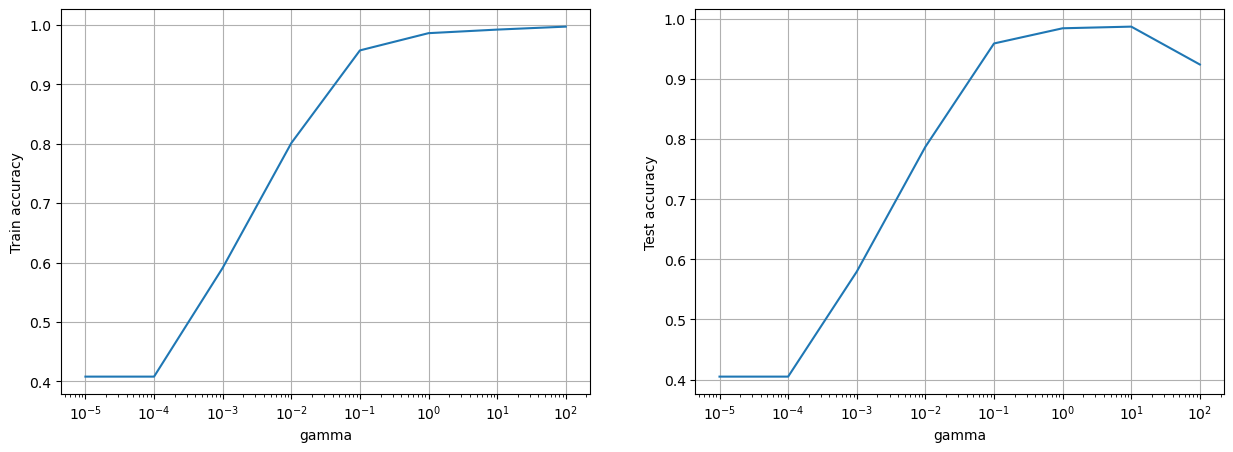

In [15]:
#Test with different values of gamma

gamma_values = np.logspace(-5,2,8)
print(gamma_values)
# use rbf kernel and C=1
parameters = {'C': 1, 'kernel': 'rbf'}
train_acc_list, test_acc_list = [], []

for value in gamma_values:
    svm = GridSearchCV(SVC(kernel=parameters['kernel'], probability=True, random_state=ID), param_grid= {'C':[1], 'gamma':[value]}, cv=4)
    svm.fit(X_train, y_train)

    # Training
    train_score = svm.score(X_train, y_train)
    train_acc_list.append(train_score)

    # Testing
    test_score = svm.score(X_test, y_test)
    test_acc_list.append(test_score)


# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## B) More data
Now let's do the same but using more data points for training.

**TO DO (B.0):** Choose a higher number of data points (e.g. x = 10000) for training data depending on your computing capability.

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 10000  # 1e4

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

# initialize support variables for boundaries visualization
granularity = 25
x_max = np.abs(X).max()
x_range = np.linspace(-x_max, x_max, granularity)
x_grid = np.stack(np.meshgrid(x_range, x_range, x_range)).reshape(3, -1).T

Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [4023 1674 3682  621]


**TO DO (B.1):** Let's try to use SVM with parameters obtained from the best model for $m_{training} =  10000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO (C.Q1) cell below.

In [17]:
#get training and test error for the best SVM model from CV
best_SVM = {'C': [100], 'kernel':['rbf'], 'gamma': [0.1]}

best_SVM_train = GridSearchCV(SVC(probability=True, random_state=ID), param_grid=best_SVM, cv = 4)
best_SVM_train.fit(X_train, y_train)
# (error is 1 - svm.score)
training_error = 1 - best_SVM_train.score(X_train, y_train)
test_error = 1 - best_SVM_train.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.012700
Best SVM test error: 0.010786


**TO DO (B.2):** Just for comparison, let's also use logistic regression (without regularization, i.e. with C very large).

In [18]:
from sklearn import linear_model

logreg_no_reg = linear_model.LogisticRegression(C=1e10, random_state=ID)
logreg_no_reg.fit(X_train, y_train)

training_error = 1 - logreg_no_reg.score(X_train, y_train)
test_error = 1 - logreg_no_reg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.110300
Best logistic regression test error: 0.111591


**TO DO (B.3):** Try logistic regression with regularization (use C=1)

In [19]:
logreg = linear_model.LogisticRegression(C=1, random_state=ID)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.109200
Best logistic regression test error: 0.110022


# C) Boundaries Visualization

Now let us compare the shape of classification boundaries. 


**TO DO (C.0):** Use the SVM, logistic regression (with and without regularization) to predict on the test set X_test. 

In [20]:
rbf_SVM_test = best_SVM_train.predict(X_test)
lr_test = logreg_no_reg.predict(X_test)
regL2_test = logreg.predict(X_test)

We constructed a grid of all possible combinations of input values, we now use it to extract the classification boundaries of the three classifiers by having them predict on each input.

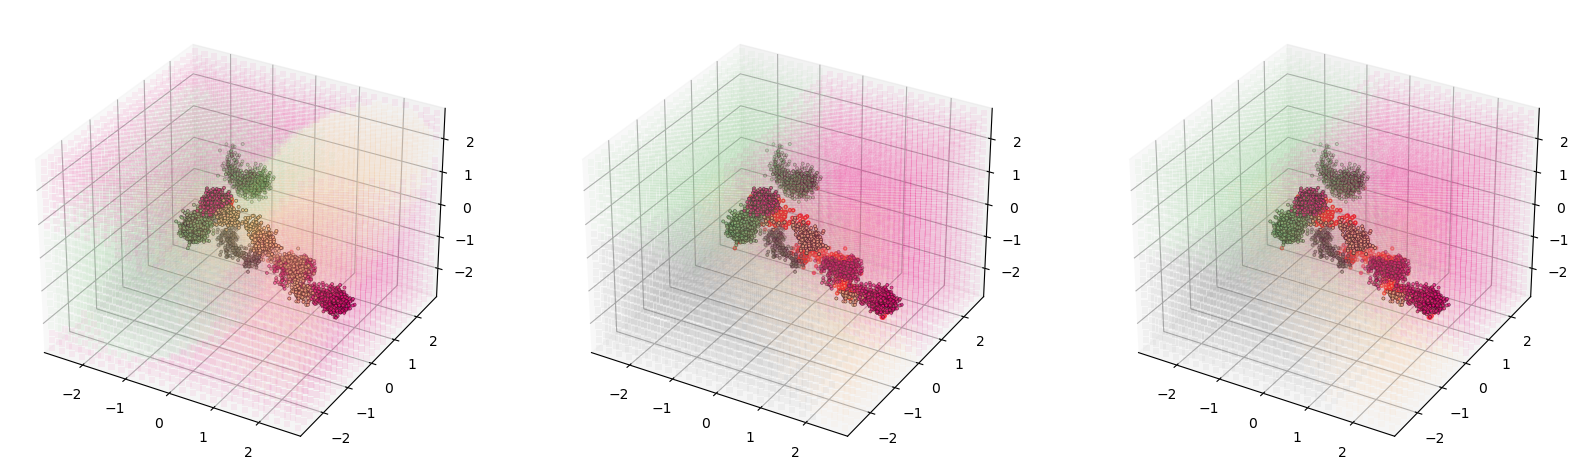

In [21]:
rbf_SVM_grid = best_SVM_train.predict(x_grid)
lr_grid = logreg_no_reg.predict(x_grid)
regL2_grid = logreg.predict(x_grid)


rbf_SVM_m = y_test == rbf_SVM_test
lr_m = y_test == lr_test
regL2_m = y_test == regL2_test

fig = plt.figure(figsize=(20,36))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

ax1.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=rbf_SVM_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax2.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=lr_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax3.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=regL2_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')

ax1.scatter(X_test[rbf_SVM_m,0], X_test[rbf_SVM_m,1], X_test[rbf_SVM_m,2], c=y_test[rbf_SVM_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax1.scatter(X_test[~rbf_SVM_m,0], X_test[~rbf_SVM_m,1], X_test[~rbf_SVM_m,2], c=y_test[~rbf_SVM_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax1.set_xlim([-x_max, x_max])
ax1.set_ylim([-x_max, x_max])
ax1.set_zlim([-x_max, x_max])

ax2.scatter(X_test[lr_m,0], X_test[lr_m,1], X_test[lr_m,2], c=y_test[lr_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax2.scatter(X_test[~lr_m,0], X_test[~lr_m,1], X_test[~lr_m,2], c=y_test[~lr_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax2.set_xlim([-x_max, x_max])
ax2.set_ylim([-x_max, x_max])
ax2.set_zlim([-x_max, x_max])

ax3.scatter(X_test[regL2_m,0], X_test[regL2_m,1], X_test[regL2_m,2], c=y_test[regL2_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax3.scatter(X_test[~regL2_m,0], X_test[~regL2_m,1], X_test[~regL2_m,2], c=y_test[~regL2_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax3.set_xlim([-x_max, x_max])
ax3.set_ylim([-x_max, x_max])
ax3.set_zlim([-x_max, x_max]);

**TO DO (C.Q1) [Answer the following]** <br> 
Compare and discuss:
1. the results from SVM with m=600 and with m=10000 (or whatever value you set) training data points. If you stopped the SVM, include such aspect in your comparison.
2. the results of SVM and of Logistic Regression

<div class="alert alert-block alert-info">
**ANSWER C.Q1**:<br>

1. By increasing the data used, the test error decreases, while the training error remains approximately the same. This is in agreement with theory, since a model trained on a greater number of instances generalizes better.
2. The result of SVM is slightly better than those obtained with the Logistic Regression - without discriminating between the Logistic Regression with regularization ($C=1$) and without regularization ($C=10^{10}$).
    </div>

**TO DO (C.1):** Change the code below to highlight the samples classified correctly by SVM and wrongly by logistic regression.

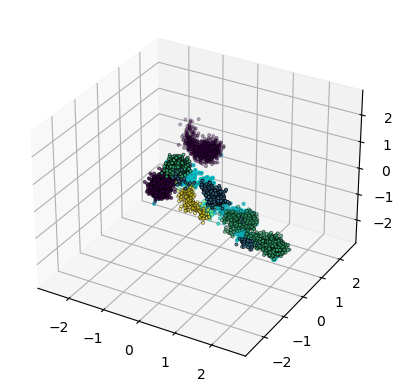

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

mask = []
for i in range(y_test.shape[0]): 
    if rbf_SVM_test[i] == y_test[i] and (lr_test[i] != y_test[i] or regL2_test[i] != y_test[i]):    # correctly classified by SVM 
                                                                                                    # and wrong classfied by Logistic Regression
        mask.append(True)
    else:
        mask.append(False)
mask = np.array(mask)   # convert to a numpy array
ax.scatter(X_test[mask,0], X_test[mask,1], X_test[mask,2], c=y_test[mask], linewidth=1, edgecolor="c", marker=".")
ax.scatter(X_test[~mask,0], X_test[~mask,1], X_test[~mask,2], c=y_test[~mask], linewidth=.5, edgecolor="k", marker=".")
ax.set_xlim([-x_max, x_max])
ax.set_ylim([-x_max, x_max])
ax.set_zlim([-x_max, x_max]);

**TO DO (C.2):** Plot the confusion matrix for the SVM classifier and for logistic regression. The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors. You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation). You can also print also the normalized confusion matrix.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, rbf_SVM_test)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, lr_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [2095  854 1841  309]

 Confusion matrix SVM  
 
 [[2095    0    0    0]
 [   0  820   34    0]
 [   0   21 1820    0]
 [   0    0    0  309]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.96 0.04 0.  ]
 [0.   0.01 0.99 0.  ]
 [0.   0.   0.   1.  ]]

 Confusion matrix LR  
 
 [[2090    0    1    4]
 [   0  343  483   28]
 [   2    9 1827    3]
 [   4    0   35  270]]

 Confusion matrix LR (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.4  0.57 0.03]
 [0.   0.   0.99 0.  ]
 [0.01 0.   0.11 0.87]]


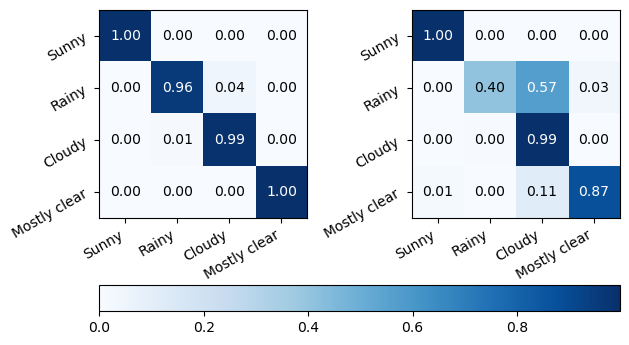

In [24]:
fig, axs = plt.subplots(1, 2)

for idx, conf in enumerate([confusion_SVM, confusion_LR]):
    
    im = axs[idx].imshow(conf /counts[:,None], cmap="Blues",interpolation='nearest')
    axs[idx].set_xticks([0,1,2,3])
    axs[idx].set_yticks([0,1,2,3])
    axs[idx].set_xticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    axs[idx].set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    cm = conf /counts[:,None]
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axs[idx].text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
fig.colorbar(im, ax=axs[:], location='bottom')  
plt.show()

**TO DO (C.Q2) [Answer the following]** <br> 
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one? Make some guesses on the possible causes.


<div class="alert alert-block alert-info">
    **ANSWER C.Q2**:<br>

The diagonal elements of the confusion matrices represent the number of cases for which the predicted label is equal to the true label, while the other cells correspond to errors. The closer the diagonal elements, of the normalized confusion matrix, are to **1**, the better.
Both models permorf with good accuracy, even if the SVM outperform the Logistic Regression in discriminating between, for istance, rainy and cloudly weather, which are, by the way, two classes that can have similar features.  
    </div>